In [1]:
import sys
import os
sys.path.append('..')
import numpy as np
import pandas as pd
from models import sir
from config import get_project_root

In [2]:
DATA_FOLDER = f'{get_project_root()}/data'
INFECTADOS_PATH = f'{DATA_FOLDER}/preprocessed/infectados.csv'
HABITANTES_PATH = f'{DATA_FOLDER}/preprocessed/habitantes.csv'
VACUNADOS_PATH = f'{DATA_FOLDER}/preprocessed/vacunados.csv'
YEARS = [2018, 2019, 2020, 2021, 2022]
MONTHS = ['ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGOS', 'SEP', 'OCT', 'NOV', 'DIC']


In [3]:
habitantes_curve = pd.read_csv(HABITANTES_PATH).set_index('ANO')
for month in MONTHS:
    habitantes_curve[month] = habitantes_curve['JUL']
max_habs = habitantes_curve.max().max()
max_habs

11101945

In [4]:
def extract_curve(path=None, df=None):
    if df is None:
        df = pd.read_csv(path).set_index('ANO')
    df = df[df.columns[:12]].T
    values = []
    for year in YEARS:
        values.extend(df[year].tolist())
    return pd.Series(values)

infectuous_curve = extract_curve(path=INFECTADOS_PATH)  
vacunados_curve = extract_curve(path=VACUNADOS_PATH)
recovered_curve = pd.Series([0]*len(infectuous_curve))

In [5]:
for ix, val in enumerate(infectuous_curve):
    recovered_curve[ix+1] = val

In [6]:
susceptible_curve = max_habs - infectuous_curve - vacunados_curve - recovered_curve



In [7]:
susceptible_curve

0     11054236.0
1     10844358.0
2     10324071.0
3     11049769.0
4     11035991.0
         ...    
56    11101945.0
57    11101945.0
58    11101945.0
59    11101945.0
60           NaN
Length: 61, dtype: float64

In [8]:
data = pd.concat([susceptible_curve, infectuous_curve, recovered_curve, vacunados_curve], axis=1)[:59]
data

,0,1,2,3
0,11054236.0,0.0,0.0,47709.0
1,10844358.0,0.0,0.0,257587.0
2,10324071.0,0.0,0.0,777874.0
3,11049769.0,0.0,0.0,52176.0
4,11035991.0,12.0,0.0,65942.0
5,11056825.0,0.0,12.0,45108.0
6,11057401.0,0.0,0.0,44544.0
7,11043367.0,4.0,0.0,58574.0
8,11025385.0,1.0,4.0,76555.0
9,11032760.0,2.0,1.0,69182.0


In [9]:
data_numpy = np.array(data)/max_habs

In [10]:
data_numpy

array([[9.95702645e-01, 0.00000000e+00, 0.00000000e+00, 4.29735510e-03],
       [9.76798030e-01, 0.00000000e+00, 0.00000000e+00, 2.32019705e-02],
       [9.29933539e-01, 0.00000000e+00, 0.00000000e+00, 7.00664613e-02],
       [9.95300283e-01, 0.00000000e+00, 0.00000000e+00, 4.69971703e-03],
       [9.94059239e-01, 1.08089168e-06, 0.00000000e+00, 5.93967994e-03],
       [9.95935847e-01, 0.00000000e+00, 1.08089168e-06, 4.06307183e-03],
       [9.95987730e-01, 0.00000000e+00, 0.00000000e+00, 4.01226992e-03],
       [9.94723627e-01, 3.60297227e-07, 0.00000000e+00, 5.27601245e-03],
       [9.93103911e-01, 9.00743068e-08, 3.60297227e-07, 6.89563856e-03],
       [9.93768209e-01, 1.80148614e-07, 9.00743068e-08, 6.23152069e-03],
       [9.95014477e-01, 0.00000000e+00, 1.80148614e-07, 4.98534266e-03],
       [9.95726695e-01, 0.00000000e+00, 0.00000000e+00, 4.27330526e-03],
       [9.95378107e-01, 0.00000000e+00, 0.00000000e+00, 4.62189283e-03],
       [9.94142288e-01, 0.00000000e+00, 0.00000000e

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [12]:
class SIRV(nn.Module):
    def __init__(self):
        super(SIRV, self).__init__()
        self.lambda1 = nn.Linear(1,1, bias = False) # tasa de contacto efectivo
        self.lambda2 = nn.Linear(1,1, bias = False) # tasa de immunizacion
        self.lambda3 = nn.Linear(1,1, bias = False) # tasa de recuperacion
    
    def forward(self, x, n):
        ns = torch.zeros([n, 4],dtype=torch.float, requires_grad = False)
        ns[0] = x.view(1, 4).clone()
        for i in range(1,n):
            a = ns[i-1].clone()
            ns[i][0] = a[0].view(1,1) - self.lambda1(a[0]*a[1].view(1,1)) - self.lambda2(a[0].view(1,1))
            ns[i][1] = a[1].view(1,1) + self.lambda1(a[0]*a[1].view(1,1)) - self.lambda3(a[1].view(1,1))  - self.lambda2(a[1].view(1,1))
            ns[i][2] = a[2].view(1,1) + self.lambda3(a[1].view(1,1))
            ns[i][3] = a[3].view(1,1) + self.lambda2(a[1].view(1,1))
        return ns[1:].reshape(-1,4)


In [14]:
y = torch.from_numpy(data_numpy.astype(np.float32))/10000
#downscaled by 10000 to avoid gradient explosion
sir = SIRV()
opt = torch.optim.Adam(sir.parameters(), lr=0.05)
loss_func = nn.SmoothL1Loss()
best = 10000
with torch.autograd.set_detect_anomaly(True):
    for epoch in range(1000):
        out = sir(y[0], len(y))
        out = out.squeeze()
        loss = loss_func(out, y[1:])
        loss.backward()
        opt.step() 
        opt.zero_grad()
        if loss.item() < best:
            best = loss.item()
            torch.save(sir, 'sir.pkl')
        if epoch%100 == 0:        
            print('loss: {}'.format(loss.item()))



loss: 1.0369289157097228e-05
loss: 1.1069986038947377e-09
loss: 1.106969627073795e-09
loss: 1.1069155592124957e-09
loss: 1.1068499450317404e-09
loss: 1.1067732286207388e-09
loss: 1.1066858540687008e-09
loss: 1.1065882654648362e-09
loss: 1.1064799076976328e-09
loss: 1.106361113833998e-09


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
DOWNSAMPLE = 10000
model = torch.load('sir.pkl')
window = 10
y = torch.from_numpy(data_numpy.astype(np.float32))/DOWNSAMPLE
h = y[0]
res = model(h,85)


In [26]:
res

tensor([[9.6762e-05, 0.0000e+00, 0.0000e+00, 4.2974e-07],
        [9.4033e-05, 0.0000e+00, 0.0000e+00, 4.2974e-07],
        [9.1380e-05, 0.0000e+00, 0.0000e+00, 4.2974e-07],
        [8.8803e-05, 0.0000e+00, 0.0000e+00, 4.2974e-07],
        [8.6298e-05, 0.0000e+00, 0.0000e+00, 4.2974e-07],
        [8.3864e-05, 0.0000e+00, 0.0000e+00, 4.2974e-07],
        [8.1499e-05, 0.0000e+00, 0.0000e+00, 4.2974e-07],
        [7.9200e-05, 0.0000e+00, 0.0000e+00, 4.2974e-07],
        [7.6966e-05, 0.0000e+00, 0.0000e+00, 4.2974e-07],
        [7.4795e-05, 0.0000e+00, 0.0000e+00, 4.2974e-07],
        [7.2686e-05, 0.0000e+00, 0.0000e+00, 4.2974e-07],
        [7.0635e-05, 0.0000e+00, 0.0000e+00, 4.2974e-07],
        [6.8643e-05, 0.0000e+00, 0.0000e+00, 4.2974e-07],
        [6.6707e-05, 0.0000e+00, 0.0000e+00, 4.2974e-07],
        [6.4825e-05, 0.0000e+00, 0.0000e+00, 4.2974e-07],
        [6.2997e-05, 0.0000e+00, 0.0000e+00, 4.2974e-07],
        [6.1220e-05, 0.0000e+00, 0.0000e+00, 4.2974e-07],
        [5.949

In [28]:
res[:,0]

tensor([9.6762e-05, 9.4033e-05, 9.1380e-05, 8.8803e-05, 8.6298e-05, 8.3864e-05,
        8.1499e-05, 7.9200e-05, 7.6966e-05, 7.4795e-05, 7.2686e-05, 7.0635e-05,
        6.8643e-05, 6.6707e-05, 6.4825e-05, 6.2997e-05, 6.1220e-05, 5.9493e-05,
        5.7815e-05, 5.6185e-05, 5.4600e-05, 5.3060e-05, 5.1563e-05, 5.0109e-05,
        4.8696e-05, 4.7322e-05, 4.5987e-05, 4.4690e-05, 4.3430e-05, 4.2205e-05,
        4.1014e-05, 3.9858e-05, 3.8733e-05, 3.7641e-05, 3.6579e-05, 3.5547e-05,
        3.4545e-05, 3.3570e-05, 3.2624e-05, 3.1703e-05, 3.0809e-05, 2.9940e-05,
        2.9096e-05, 2.8275e-05, 2.7478e-05, 2.6703e-05, 2.5949e-05, 2.5217e-05,
        2.4506e-05, 2.3815e-05, 2.3143e-05, 2.2490e-05, 2.1856e-05, 2.1240e-05,
        2.0641e-05, 2.0058e-05, 1.9493e-05, 1.8943e-05, 1.8409e-05, 1.7889e-05,
        1.7385e-05, 1.6894e-05, 1.6418e-05, 1.5955e-05, 1.5505e-05, 1.5067e-05,
        1.4643e-05, 1.4230e-05, 1.3828e-05, 1.3438e-05, 1.3059e-05, 1.2691e-05,
        1.2333e-05, 1.1985e-05, 1.1647e-

/var/folders/g0/jqvp4xxs5pn4cds1xb9339xm0000gn/T/ipykernel_47560/4024242392.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "linewidth" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('prediction.png', format='png', linewidth = 0.01)


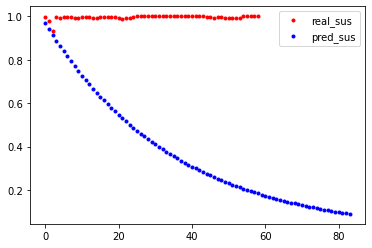

In [34]:
predicted_susceptible = res[:,0].detach().numpy()*DOWNSAMPLE
real_susceptible = y[:,0].detach().numpy()*DOWNSAMPLE
plt.plot(real_susceptible, color = 'r', linewidth=0, marker='.', label='real_sus')
plt.plot(predicted_susceptible, color = 'b', linewidth=0, marker='.', label='pred_sus')
plt.legend()
plt.savefig('prediction.png', format='png', linewidth = 0.01)

/var/folders/g0/jqvp4xxs5pn4cds1xb9339xm0000gn/T/ipykernel_47560/1286103781.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "linewidth" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('prediction_vaccinated.png', format='png', linewidth = 0.01)


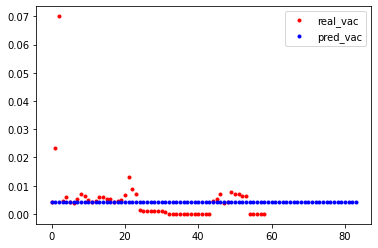

In [35]:
predicted_vaccinated = res[:,3].detach().numpy()*DOWNSAMPLE
real_vaccinated = y[:,3].detach().numpy()*DOWNSAMPLE
plt.plot(real_vaccinated, color = 'r', linewidth=0, marker='.', label='real_vac')
plt.plot(predicted_vaccinated, color = 'b', linewidth=0, marker='.', label='pred_vac')
plt.legend()
plt.savefig('prediction_vaccinated.png', format='png', linewidth = 0.01)

Que pasa si le damos mas peso a fitear a los susceptibles?
